In [ ]:
!pip install PM4Py

In [2]:
import pm4py
import pandas as pd
from PIL import Image
import numpy as np

In [9]:
log = pm4py.read_xes('/content/drive/MyDrive/CourseProject/Test_1/Response_Never_Log.xes')
log["concept:instance"]=log["concept:instance"].apply(str)
log["concept:name"]=log["concept:name"].apply(str)
log['time:timestamp']= pd.to_datetime(log['time:timestamp'])
#log = log.assign(Activity_Name =lambda x: "Activity_" + x.ActivityID)
log = log[['concept:instance', 'concept:name', 'time:timestamp']]
log = log.rename(columns={"concept:instance": "CaseID", "concept:name": "Activity_Name", "time:timestamp": "CompleteTimestamp"})
log

parsing log, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

,CaseID,Activity_Name,CompleteTimestamp
0,0,Start,2023-03-22 07:16:04.133000+00:00
1,0,Ist,2023-03-22 07:17:04.133000+00:00
2,0,Icmp,2023-03-22 07:18:04.133000+00:00
3,0,End,2023-03-22 07:19:04.133000+00:00
4,1,Start,2023-03-22 07:16:48.008000+00:00
...,...,...,...
588,99,Start,2023-03-22 08:50:37.506000+00:00
589,99,Ist,2023-03-22 08:51:37.506000+00:00
590,99,A,2023-03-22 08:52:37.506000+00:00
591,99,Icmp,2023-03-22 08:53:37.506000+00:00


<ipython-input-19-e219d54df30a>:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  format_df = pm4py.format_dataframe(log, case_id = 'CaseID', activity_key = 'Activity_Name', timestamp_key = 'CompleteTimestamp')
/usr/local/lib/python3.9/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


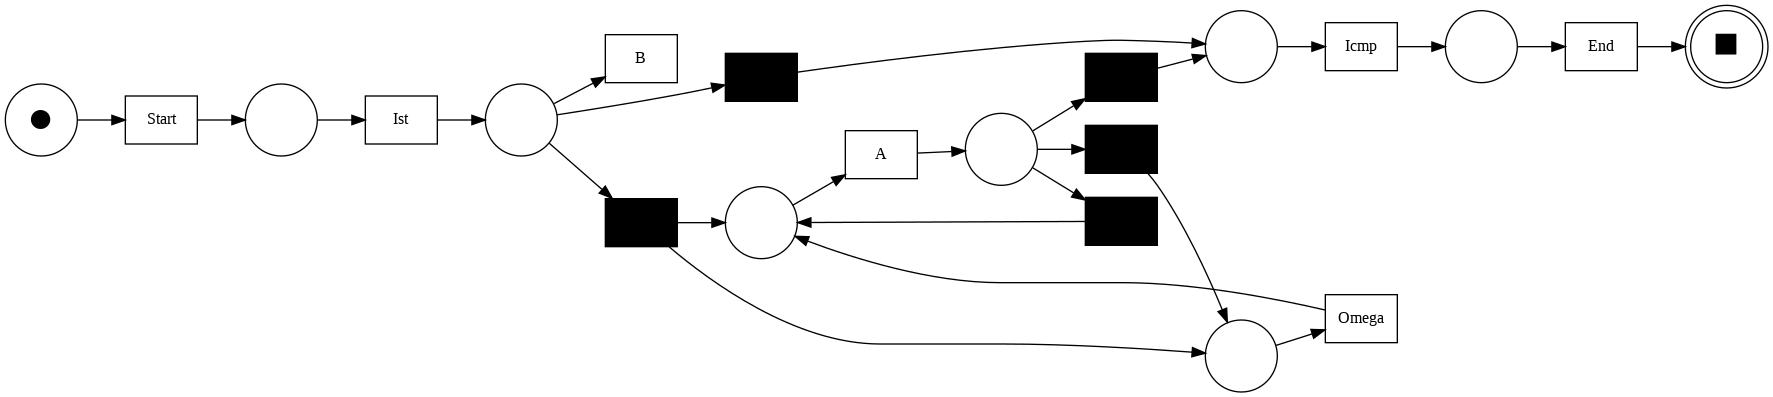

In [19]:
format_df = pm4py.format_dataframe(log, case_id = 'CaseID', activity_key = 'Activity_Name', timestamp_key = 'CompleteTimestamp')
event_log = pm4py.convert_to_event_log(format_df)
net, im, fm = pm4py.discover_petri_net_heuristics(event_log, 0.95)
pm4py.view_petri_net(net, im, fm, format = 'png')

In [20]:
# получаем уникальные активити
activities = list(log['Activity_Name'].unique())
act_dict = {}

# проводим соответствие между номером и активити
act_num = len(activities)
for i in range(act_num):
  act_dict[activities[i-1]] = i

act_dict

{'B': 0, 'Start': 1, 'Ist': 2, 'Icmp': 3, 'End': 4, 'Omega': 5, 'A': 6}

In [21]:
ids = list(log['CaseID'].unique())
case_logs = []
max_trace_len = 0
for id in ids:
  case_log = log.query("`{0}` == @id".format('CaseID'))
  case_log.sort_values(by=['CompleteTimestamp'])
  recoded_trace = []
  for act in case_log['Activity_Name'].to_numpy():
    recoded_trace.append(act_dict[act])

  case_logs.append(recoded_trace)
  if (len(recoded_trace) > max_trace_len):
    max_trace_len = len(recoded_trace)


In [22]:
case_logs

[[1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 5, 6, 3, 4],
 [1, 2, 6, 3, 4],
 [1, 2, 5, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 5, 6, 3, 4],
 [1, 2, 0, 0, 3, 4],
 [1, 2, 6, 6, 5, 5, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 5, 6, 6, 5, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 6, 5, 6, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 5, 5, 3, 4],
 [1, 2, 5, 0, 0, 5, 3, 4],
 [1, 2, 0, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 5, 3, 4],
 [1, 2, 6, 6, 6, 5, 6, 3, 4],
 [1, 2, 5, 5, 5, 6, 5, 5, 3, 4],
 [1, 2, 0, 0, 3, 4],
 [1, 2, 5, 0, 0, 5, 5, 6, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 0, 6, 3, 4],
 [1, 2, 5, 6, 3, 4],
 [1, 2, 6, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 6, 5, 6, 5, 6, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 6, 3, 4],
 [1, 2, 0, 5, 6, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 0, 0, 0, 3, 4],
 [1, 2, 0, 0, 0, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 0, 6, 5, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 0, 0, 0, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 5, 6, 6, 5,

In [ ]:
# n = 8
# matrix = [] 
# for i in range(n): 
#     matrix.append([0] * n)

# for trace in case_logs:
#   for i in range(len(trace)):
#     if (i < n -1):
      

In [23]:
np_case_logs = np.unique(case_logs).tolist()
np_case_logs.sort(key=len)
np_case_logs

/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


[[1, 2, 3, 4],
 [1, 2, 0, 3, 4],
 [1, 2, 5, 3, 4],
 [1, 2, 6, 3, 4],
 [1, 2, 0, 0, 3, 4],
 [1, 2, 0, 6, 3, 4],
 [1, 2, 5, 0, 3, 4],
 [1, 2, 5, 5, 3, 4],
 [1, 2, 5, 6, 3, 4],
 [1, 2, 6, 6, 3, 4],
 [1, 2, 0, 0, 0, 3, 4],
 [1, 2, 0, 5, 6, 3, 4],
 [1, 2, 0, 6, 5, 3, 4],
 [1, 2, 5, 0, 6, 3, 4],
 [1, 2, 5, 6, 5, 3, 4],
 [1, 2, 5, 6, 6, 3, 4],
 [1, 2, 6, 5, 5, 3, 4],
 [1, 2, 6, 5, 6, 3, 4],
 [1, 2, 6, 6, 6, 3, 4],
 [1, 2, 0, 5, 6, 6, 3, 4],
 [1, 2, 5, 0, 0, 5, 3, 4],
 [1, 2, 5, 6, 6, 5, 3, 4],
 [1, 2, 6, 5, 5, 6, 3, 4],
 [1, 2, 6, 6, 5, 5, 3, 4],
 [1, 2, 5, 6, 6, 5, 6, 3, 4],
 [1, 2, 6, 5, 6, 5, 6, 3, 4],
 [1, 2, 6, 5, 6, 6, 6, 3, 4],
 [1, 2, 6, 6, 6, 5, 6, 3, 4],
 [1, 2, 5, 0, 0, 5, 5, 6, 3, 4],
 [1, 2, 5, 5, 5, 6, 5, 5, 3, 4],
 [1, 2, 5, 6, 5, 5, 6, 6, 5, 5, 3, 4],
 [1, 2, 5, 6, 6, 6, 6, 5, 5, 5, 3, 4],
 [1, 2, 6, 5, 6, 6, 6, 6, 5, 6, 3, 4],
 [1, 2, 6, 6, 6, 5, 5, 6, 6, 5, 3, 4],
 [1, 2, 0, 6, 5, 6, 5, 6, 6, 6, 6, 3, 4],
 [1, 2, 0, 6, 6, 6, 5, 6, 5, 5, 6, 5, 3, 4]]

In [24]:
# паддинг нулями
for trace in np_case_logs:
  if (len(trace) < max_trace_len):
    trace.extend([0]*(max_trace_len-len(trace)))

[[ 42  85 127 170   0   0   0   0   0   0   0   0   0   0]
 [ 42  85   0 127 170   0   0   0   0   0   0   0   0   0]
 [ 42  85 212 127 170   0   0   0   0   0   0   0   0   0]
 [ 42  85 255 127 170   0   0   0   0   0   0   0   0   0]
 [ 42  85   0   0 127 170   0   0   0   0   0   0   0   0]
 [ 42  85   0 255 127 170   0   0   0   0   0   0   0   0]
 [ 42  85 212   0 127 170   0   0   0   0   0   0   0   0]
 [ 42  85 212 212 127 170   0   0   0   0   0   0   0   0]
 [ 42  85 212 255 127 170   0   0   0   0   0   0   0   0]
 [ 42  85 255 255 127 170   0   0   0   0   0   0   0   0]
 [ 42  85   0   0   0 127 170   0   0   0   0   0   0   0]
 [ 42  85   0 212 255 127 170   0   0   0   0   0   0   0]
 [ 42  85   0 255 212 127 170   0   0   0   0   0   0   0]
 [ 42  85 212   0 255 127 170   0   0   0   0   0   0   0]
 [ 42  85 212 255 212 127 170   0   0   0   0   0   0   0]
 [ 42  85 212 255 255 127 170   0   0   0   0   0   0   0]
 [ 42  85 255 212 212 127 170   0   0   0   0   0   0   

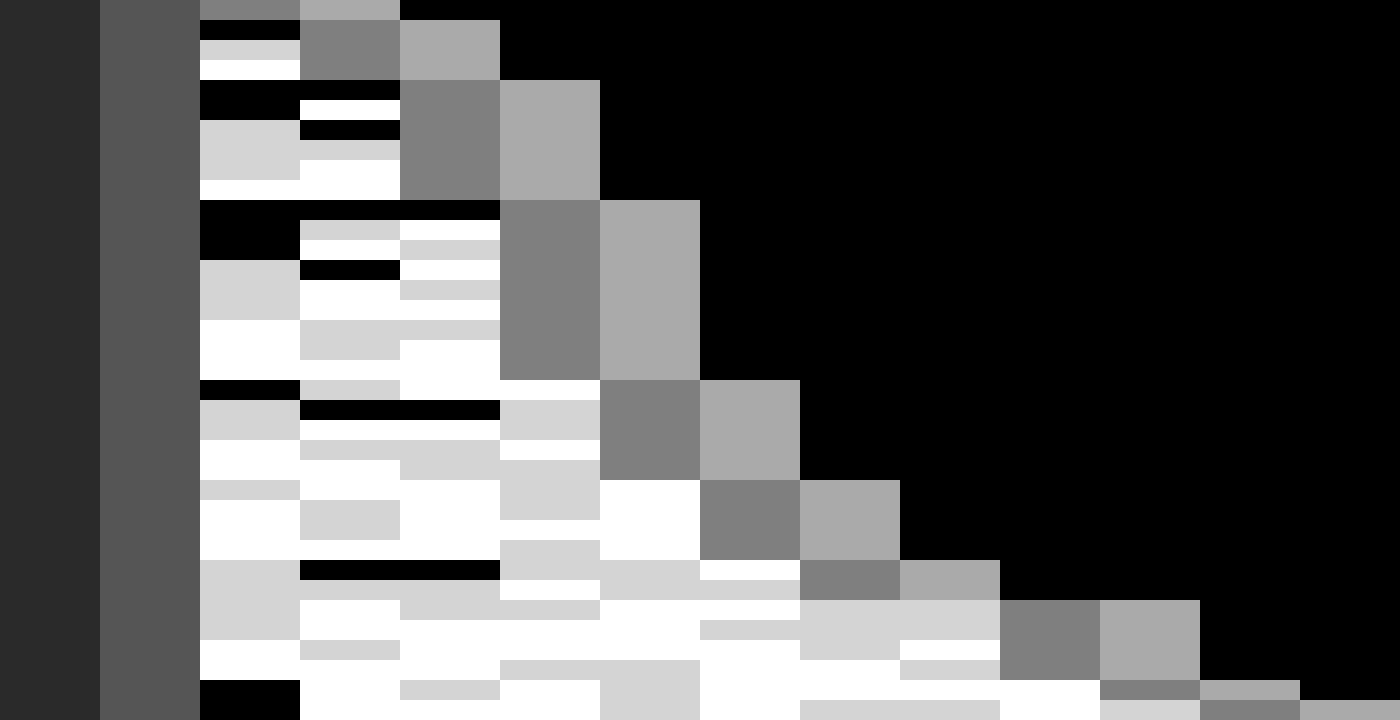

In [25]:
np_matrix = np.asmatrix(np_case_logs)
np_matrix = np_matrix.astype("uint8")
norm_matrix = np_matrix.copy()
norm_matrix *= 255.0/norm_matrix.max()

print(norm_matrix)
A = np.squeeze(np.asarray(norm_matrix)) 
img = Image.fromarray(A)
#img = img.rotate(90, Image.NEAREST, expand = 1)

img = img.resize((img.size[0]*100, img.size[1]*20),Image.NEAREST)

img

In [26]:
img.size

(1400, 720)